In [ ]:
# ipython magic

%reset -f
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [1]:
import os
import time
import sys
sys.path.append('..')
sys.path.append(r'C:\Users\Robert Lees\Documents\Code\Vape\rob_suite2p')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import utils.interareal_analysis_class as iac
import pickle

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\suite2p']


P:\rlees\Data\2019-07-15
['P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\2019-07-15_RL052_t-007', 'P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\2019-07-15_RL052_t-008'] ['P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\NAPARM\\2019-07-15_RL052_NAPARM_003', 'P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\NAPARM\\2019-07-15_RL052_NAPARM_004'] ['P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\2019-07-15_RL052_t007.paq', 'P:\\rlees\\Data\\2019-07-15\\2019-07-15_RL052\\2019-07-15_RL052_t008.paq'] ['p', 'p']
Loading 661 traces labelled as cells
P:\rlees\Data\2019-07-15\2019-07-15_RL052\NAPARM\2019-07-15_RL052_NAPARM_003\2019-07-15_RL052_NAPARM_003.xml
Numbers of trials: 100 
Number of groups: 4 
Number of shots: 1 
Number of sequence reps: 10 
Inter-group delay: 5
P:\rlees\Data\2019-07-15\2019-07-15_RL052\NAPARM\2019-07-15_RL052_NAPARM_003\2019-07-15_RL052_NAPARM_003.gpl
Single stim dur (ms): 10
P:\rlees\Data\2019-07-15\2019-07-15_RL052\2019-07-15_RL052_t007.paq


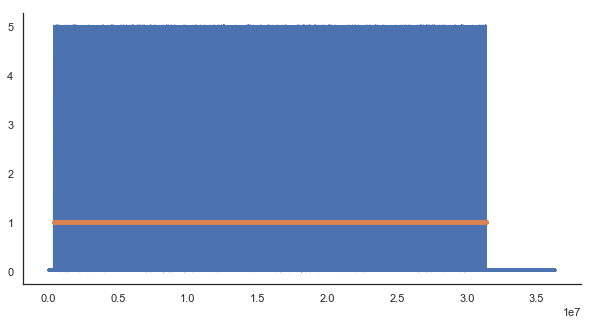

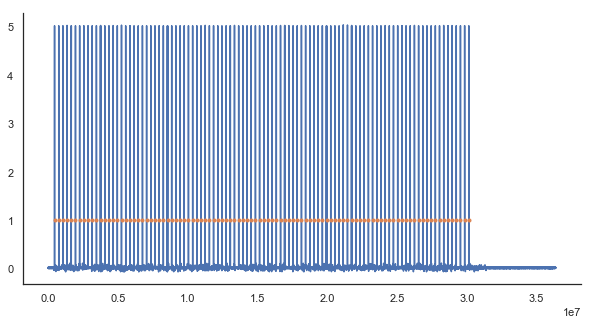

13


..\utils\interareal_analysis_class.py:447: RuntimeWarning: invalid value encountered in float_scalars
  trial = [ ( (f-baseline) / baseline) * 100 for f in trial ] #dff calc
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2803: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: Runtim

performing t-test on cells with mutliple comparisons correction
Loading 922 traces labelled as cells
P:\rlees\Data\2019-07-15\2019-07-15_RL052\NAPARM\2019-07-15_RL052_NAPARM_004\2019-07-15_RL052_NAPARM_004.xml
Numbers of trials: 100 
Number of groups: 2 
Number of shots: 1 
Number of sequence reps: 10 
Inter-group delay: 5
P:\rlees\Data\2019-07-15\2019-07-15_RL052\NAPARM\2019-07-15_RL052_NAPARM_004\2019-07-15_RL052_NAPARM_004.gpl
Single stim dur (ms): 10
P:\rlees\Data\2019-07-15\2019-07-15_RL052\2019-07-15_RL052_t008.paq


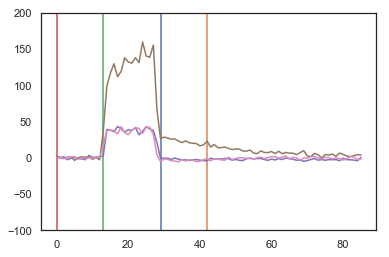

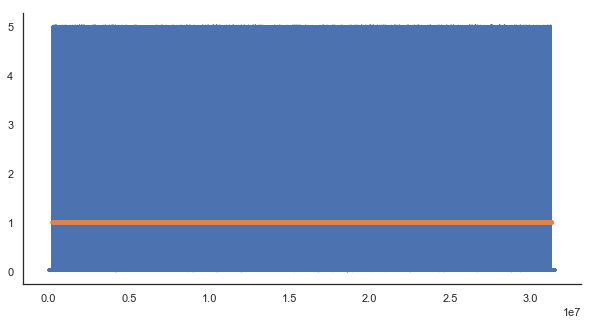

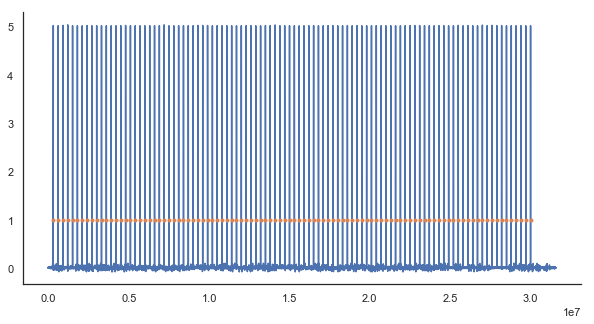

13


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


performing t-test on cells with mutliple comparisons correction


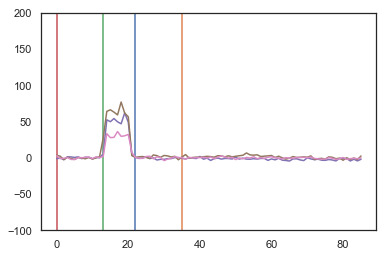

In [2]:
ss_id = '1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY'
sheet_name = '2019-07-15_RL052'
pstation_path = r'P:\rlees\Data'
stim_channel = 'markpoints2packio'
batch_size = 200

tiffs_pstation, naparms_pstation, paqs_pstation, stim_type = iac.experimentInfo(ss_id, sheet_name, pstation_path)
print(tiffs_pstation, naparms_pstation, paqs_pstation, stim_type)

paths = []

for tiff, naparm, paq in zip(tiffs_pstation, naparms_pstation, paqs_pstation):    
    addition = [tiff, naparm, paq]
    paths.append(addition)

for i,_ in enumerate(paths):
    pkl_path = r'E:\S1S2\pkl_files'
    run_number = i
    pkl_file = os.path.join(pkl_path, 'exp{}.pkl'.format(run_number))

    exp_obj = iac.interarealAnalysis(ss_id, sheet_name, paths[i], stim_type[i])
    # exp_obj.s2pRun(batch_size)
    exp_obj.s2pProcessing(subtract_neuropil=False)
    exp_obj.stimProcessing(stim_channel)
    exp_obj.cellStaProcessing()

    with open(pkl_file, 'wb') as f:
        pickle.dump(exp_obj, f)

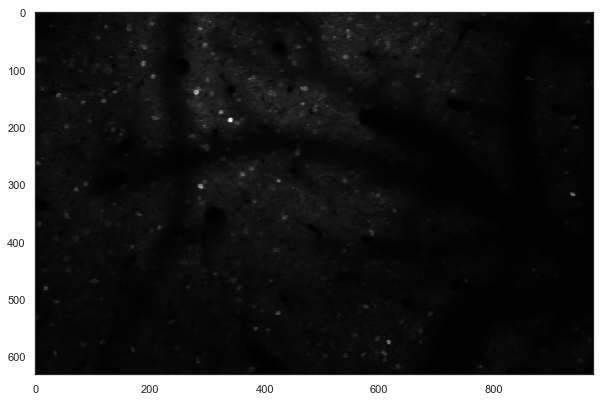

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(exp_obj.mean_img[0], 'gray')

In [23]:
s1_amplitudes = []
s2_amplitudes = []

for plane in range(exp_obj.n_planes):
    s1_amplitudes.append([amplitude for i,amplitude in enumerate(exp_obj.sta_amplitudes[plane]) if exp_obj.cell_med[plane][i][1] < 400 and ~np.isnan(amplitude)])
    s2_amplitudes.append([amplitude for i,amplitude in enumerate(exp_obj.sta_amplitudes[plane]) if exp_obj.cell_med[plane][i][1] > 450 and ~np.isnan(amplitude)])

[-10, 60, 0, 0.3]

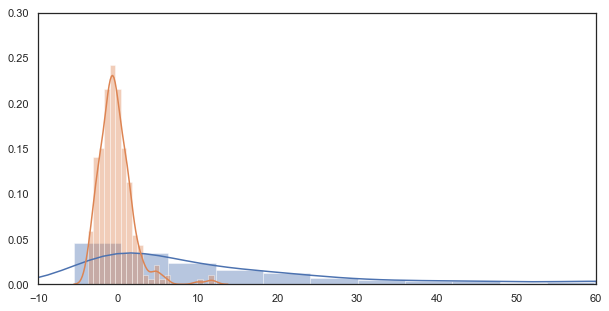

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(s1_amplitudes[0])
sns.distplot(s2_amplitudes[0])
plt.axis([-10, 60, 0, 0.3])

[-10, 60, 0, 0.3]

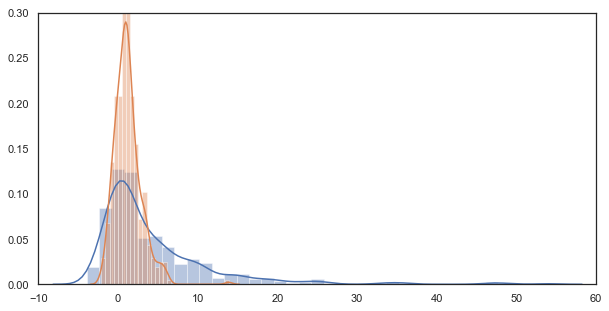

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(s1_amplitudes[0])
sns.distplot(s2_amplitudes[0])
plt.axis([-10, 60, 0, 0.3])

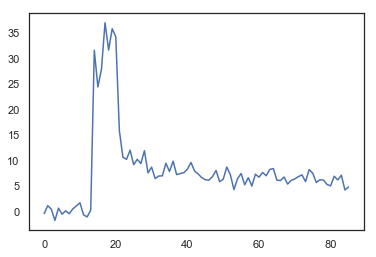

In [57]:
plt.figure()
plt.plot(exp_obj.stas[0][12])

In [22]:
t0 = time.time()

pkl_path = r'E:\S1S2\pkl_files'
run_number = 1
pkl_file = os.path.join(pkl_path, 'exp{}.pkl'.format(run_number))

with open(pkl_file, 'rb') as f:
    exp_obj = pickle.load(f)

t1 = time.time()
print(t1-t0)

0.18007373809814453
